<a href="https://colab.research.google.com/github/aqsa-bhutto07/aqsa-bhutto07/blob/main/Heart_Disease_Prediction_Using_ML_Algo_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd

# Importing Dataset

In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('dataset.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Taking care of Missing Values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Taking care of Duplicate Values

In [ ]:
data_dup=data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data=data.drop_duplicates()

In [ ]:
data_dup=data.duplicated().any()

In [ ]:
data_dup

False

# Data Processing

In [ ]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Data Encoding

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


# Feature Scaling


In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


# Splitting the Dataset into Training and Testing

In [ ]:
x=data.drop('target',axis=1)

In [ ]:
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
132,-1.375021,1,-0.661712,0.938690,0.543632,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
203,1.503322,1,2.760154,0.532247,0.018826,0.480328,False,True,False,True,...,True,True,False,False,False,False,False,False,False,True
197,1.392616,1,-0.376556,0.145158,0.587366,-0.727060,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
75,0.064151,0,0.193755,0.067741,0.499898,0.307844,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
177,1.060500,1,0.478910,1.712868,0.368697,-0.899544,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,-1.232023,-1.441906,0.368697,-0.899544,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
71,-0.378671,1,-2.144521,-0.377412,0.193761,-0.899544,False,True,False,False,...,True,False,True,True,False,False,False,False,False,True
106,1.614027,1,1.619532,-0.241930,-0.812118,-0.813302,False,False,True,True,...,False,True,False,True,False,False,False,False,True,False
271,0.728383,1,0.136724,-0.241930,-0.199843,1.342748,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [ ]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

# Logistic Regression

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

# SVC

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8032786885245902

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

# K-Nearest Neighbour Algo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='count'>

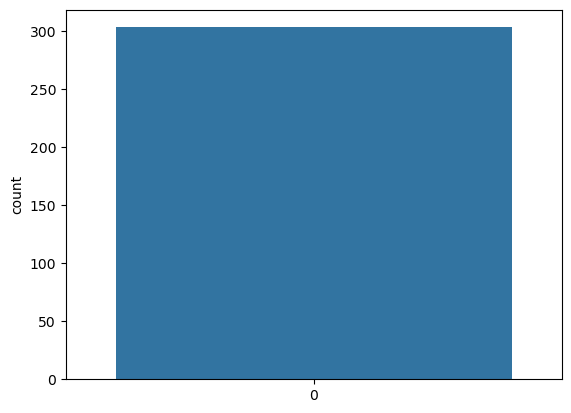

In [ ]:
sns.countplot(df['target'])

In [ ]:
x= df.iloc[:,0:13].values
y= df['target'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

Minimum error:- 0.13157894736842105 at K = 7


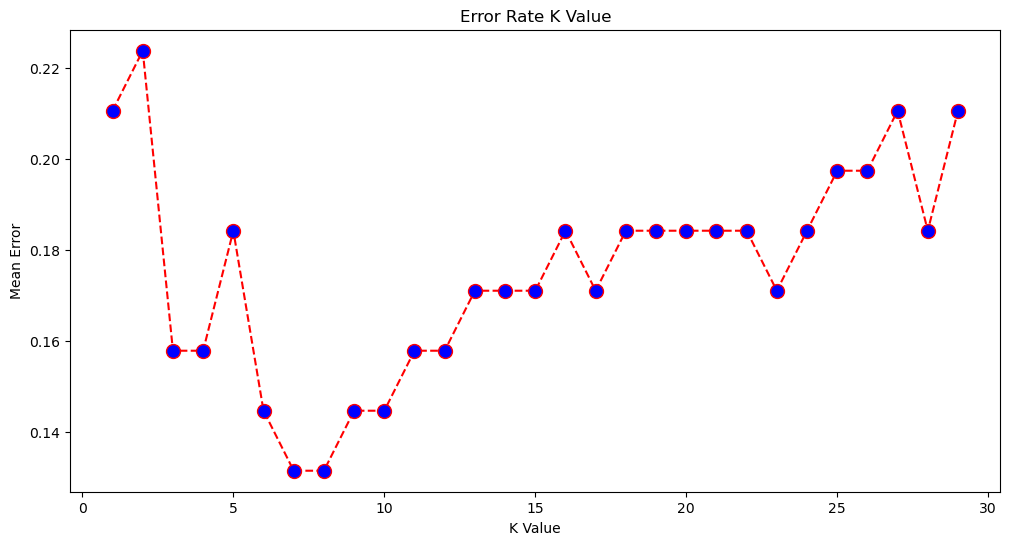

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.868421052631579